### Goals for Milestone 4:
<li> Rebuild regressions from saved data </li>
<li> Create SML </li>
<li> Compute Sharpe Ratio, Treynor Ratio and Jensen's Alpha </li>

### Get libraries

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import statsmodels.api as sm
from matplotlib import pyplot as plt

### Scenario 1: Tech sector Q1'21

## The data we saved in Milestone 3

In [4]:
### Used saved-off data
os.chdir('B:\\Documents\\Manning')
os.getcwd()
input_to_model = pd.read_csv('scen1_tech_returns.csv', index_col="Date")
input_to_model.head()

,AAPL,IBM,INTC,MSFT,GSPC,rf_daily,xs_rtn_AAPL,xs_rtn_IBM,xs_rtn_MSFT,xs_rtn_INTC,xs_rtn_GSPC
Date,,,,,,,,,,,
2021-01-05,0.012364,0.017751,0.018925,0.000965,0.007083,0.000357,0.012007,0.017393,0.000607,0.018568,0.006725
2021-01-06,-0.033662,0.024972,0.009682,-0.025929,0.005710,0.000357,-0.034019,0.024615,-0.026286,0.009325,0.005353
2021-01-07,0.034123,-0.002320,0.021331,0.028457,0.014847,0.000357,0.033766,-0.002678,0.028100,0.020974,0.014490
2021-01-08,0.008631,-0.003566,-0.010347,0.006093,0.005492,0.000317,0.008314,-0.003884,0.005775,-0.010664,0.005174
2021-01-11,-0.023249,0.000389,-0.002130,-0.009699,-0.006555,0.000317,-0.023566,0.000072,-0.010016,-0.002447,-0.006872


In [5]:
### Get columns
tech_stocks = [c for c in input_to_model.columns if not(c.startswith('xs_rtn'))]
print(tech_stocks)

['AAPL', 'IBM', 'INTC', 'MSFT', 'GSPC', 'rf_daily']


### Now generate the model

In [6]:
### Create pandas series to input to model
y_aapl = input_to_model['xs_rtn_AAPL']
y_ibm = input_to_model['xs_rtn_IBM']
y_intc = input_to_model['xs_rtn_INTC']
y_msft = input_to_model['xs_rtn_MSFT']
X_gspc = input_to_model['xs_rtn_GSPC']

In [7]:
### Constant value captures variation not explained by market
X_tech = sm.add_constant(X_gspc, prepend=False)

In [8]:
### Call to statsmodels OLS object to create models
CAPM_AAPL = sm.OLS(y_aapl, X_tech)
CAPM_results_AAPL = CAPM_AAPL.fit()

CAPM_IBM = sm.OLS(y_ibm, X_tech)
CAPM_results_IBM = CAPM_IBM.fit()

CAPM_INTC = sm.OLS(y_intc, X_tech)
CAPM_results_INTC = CAPM_INTC.fit()

CAPM_MSFT = sm.OLS(y_msft, X_tech)
CAPM_results_MSFT = CAPM_MSFT.fit()

In [9]:
def SML(rf, rm, betas, beta_names, use_actual=False, actual_ret=[0,0,0,0]):
    '''
    params:
        rf: risk-free rate, mean value
        ret: market return rate, mean
        betas: output of the CAPM fit, beta coefficient, as python list
        beta_names: for labels only, a list same length as betas
        use_actual: False if use CAPM to plot stock points, True if pass actual returns
        actual_ret: a list of returns, same length as betas and beta_names
    '''
    asset_ret = [rf + (rm - rf) * i for i in betas]
    plt.plot(betas, asset_ret, label='SML')
    plt.xlabel("Asset Beta")
    plt.ylabel("Asset Return")
    plt.title("Security Market Line")
    
    # Determine if the asset is underpriced or overpriced
    if use_actual:
        asset_ret = actual_ret
    
    for beta, return_value, beta_name in zip(betas, asset_ret, beta_names):
        
        # Plot each point
        if return_value > rm:
            plt.plot(beta, return_value, 'go')
            plt.text(beta, return_value, '%s - Underpriced' %beta_name, fontsize=9, color='green')
        elif return_value < rm:
            plt.plot(beta, return_value, 'ro')
            plt.text(beta, return_value, '%s - Overpriced' %beta_name, fontsize=9, color='red')

    # plt.plot(1, ret, "ro", label='Asset Return')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
    asset_ret = [rf + (rm - rf) * i for i in betas]
    plt.plot(betas, asset_ret, label='SML')
    plt.xlabel("Asset Beta")
    plt.ylabel("Asset Return")
    plt.title("Security Market Line")
    
    # Determine if the asset is underpriced or overpriced
    if use_actual:
        asset_ret = actual_ret

In [ ]:
    for beta, return_value, beta_name in zip(betas, asset_ret, beta_names):
        
        # Plot each point
        if return_value > rm:
            plt.plot(beta, return_value, 'go')
            plt.text(beta, return_value, '%s - Underpriced' %beta_name
                     , fontsize=9, color='green')
        elif return_value < rm:
            plt.plot(beta, return_value, 'ro')
            plt.text(beta, return_value, '%s - Overpriced' %beta_name
                     , fontsize=9, color='red')

    # plt.plot(1, ret, "ro", label='Asset Return')
    plt.legend()
    plt.grid()
    plt.show()

In [10]:
    '''
    params:
        rf: risk-free rate, mean value
        ret: market return rate, mean
        betas: output of the CAPM fit, beta coefficient, as python list
        beta_names: for labels only, a list same length as betas
        use_actual: False if use CAPM to plot stock points, True if pass actual returns
        actual_ret: a list of returns, same length as betas and beta_names
    '''

### Mean market return and mean risk-free return
rm_tech = X_tech.mean().iloc[0] ## Previously X = input_to_model['xs_rtn_GSPC']
rf_mean_tech = input_to_model['rf_daily'].mean()

### Generate a list of the betas
betas = [CAPM_results_AAPL.params.iloc[0], CAPM_results_IBM.params.iloc[0],
       CAPM_results_MSFT.params.iloc[0], CAPM_results_INTC.params.iloc[0]]
beta_names = ['AAPL','IBM','MSFT','INTC']

In [9]:
betas

[1.3888508583327241, 0.4460724903134801, 1.046009401447259, 1.7921153467078694]

In [11]:
asset_ret = [rf_mean_tech + (rm_tech - rf_mean_tech) * i for i in betas]
print(rm_tech)
print(asset_ret)

0.001031322211178726
[0.0013544282606504864, 0.0005710497814972209, 0.0010695525908258861, 0.0016895109612257639]


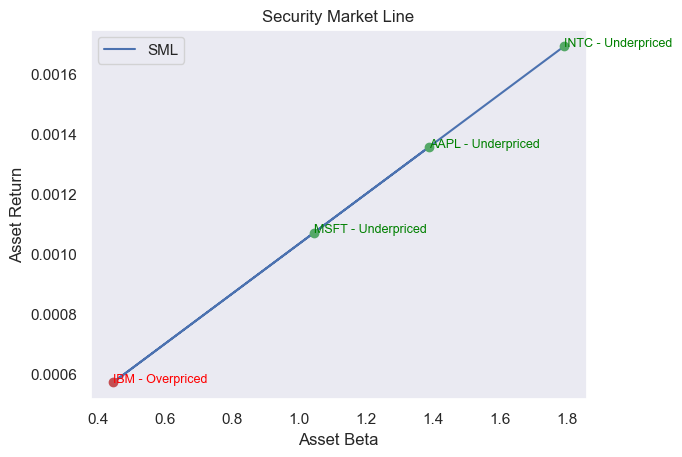

In [12]:
SML(rf=rf_mean_tech, rm=rm_tech, betas=betas, beta_names=beta_names)

### What if individual stocks become less volatile?

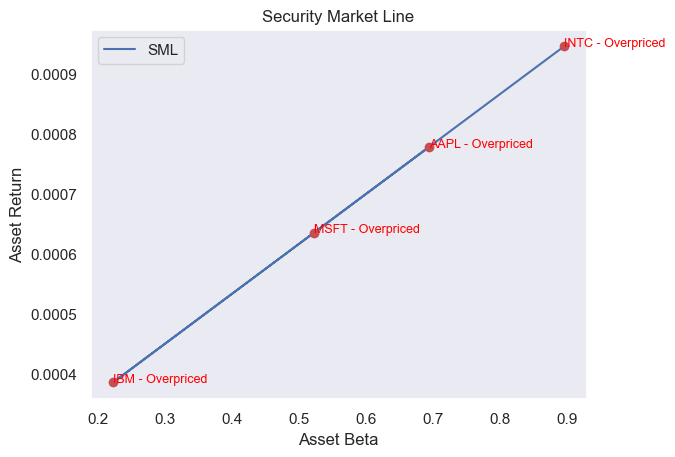

In [13]:
half_betas = [b/2 for b in betas]
SML(rf=rf_mean_tech, rm=rm_tech, betas=half_betas, beta_names=beta_names)

### What if _one_ stock becomes more volatile?

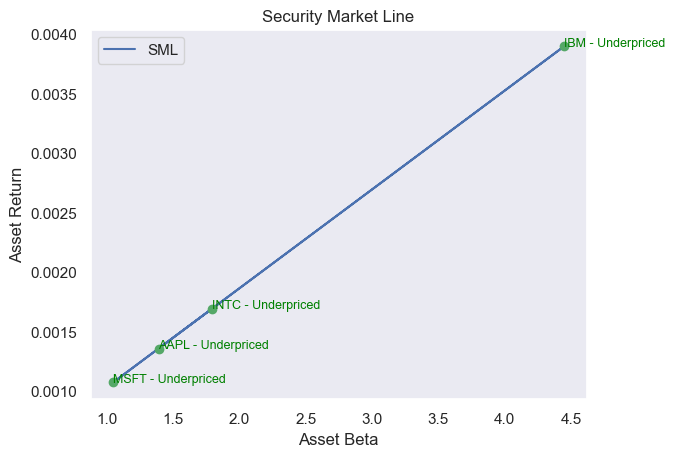

In [14]:
# betas were [1.3888508583327241, 0.4460724903134801, 1.046009401447259, 1.7921153467078694]
special_betas = [1.3888508583, 4.446072490313, 1.0460094014, 1.7921153467]
SML(rf=rf_mean_tech, rm=rm_tech, betas=special_betas, beta_names=beta_names)

### What if risk-free rate increases?

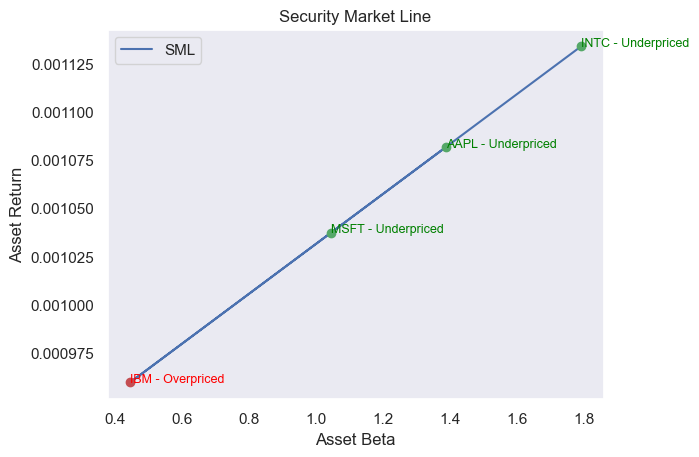

In [15]:
SML(rf=rf_mean_tech*4.5, rm=rm_tech, betas=betas, beta_names=beta_names)

## use "actual" returns

In [16]:
### capm-forecast returns
capm_ret = [rf_mean_tech + (rm_tech - rf_mean_tech) * i for i in betas]

for i, j in zip(beta_names,capm_ret):
    print("%s: %4f" %(i,j))

AAPL: 0.001354
IBM: 0.000571
MSFT: 0.001070
INTC: 0.001690


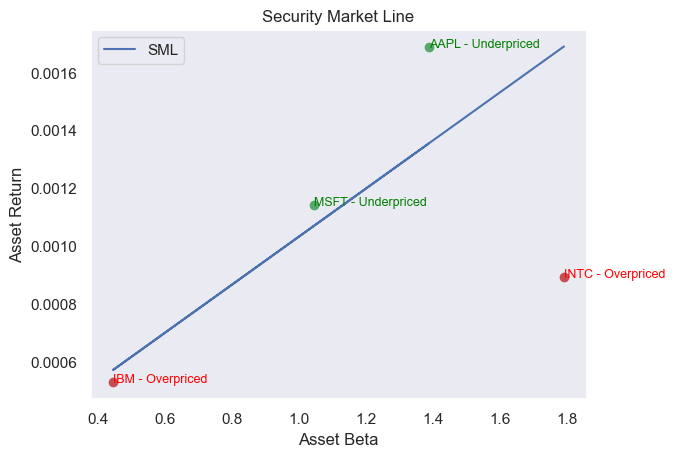

In [17]:
SML(rf=rf_mean_tech, rm=rm_tech, betas=betas, beta_names=beta_names
    , use_actual=True, actual_ret = [0.001687, 0.000528, 0.001141, 0.000891])

### Sharpe - returns to total risk

In [18]:
just_tech_stocks = [t for t in tech_stocks if t != 'rf_daily']

In [19]:
def sharpe_on_df(df, return_col, riskfree_col):
    try:
        _sdev = df[return_col].std()
        _diff = df[return_col].mean() - df[riskfree_col].mean()
        return _diff / _sdev
    except:
        print("Unable to calculate Standard Deviation of return value, %s" %return_col)
        return None

for t in just_tech_stocks:
    tmp = sharpe_on_df(input_to_model, 'xs_rtn_%s' %t, 'rf_daily')
    print("Sharpe Ratio for %s: %5f" %(t, tmp))

Sharpe Ratio for AAPL: -0.055170
Sharpe Ratio for IBM: 0.053162
Sharpe Ratio for INTC: 0.149834
Sharpe Ratio for MSFT: 0.066815
Sharpe Ratio for GSPC: 0.084300


### Treynor - returns to systemic risk

In [20]:
### Associate betas with names
beta_dict = dict(zip(beta_names, betas))
print(beta_dict)

{'AAPL': 1.3888508583327241, 'IBM': 0.4460724903134801, 'MSFT': 1.046009401447259, 'INTC': 1.7921153467078694}


In [21]:
for t in just_tech_stocks:
    _diff = input_to_model['xs_rtn_%s' %t].mean() - input_to_model['rf_daily'].mean()
    try:
        _beta = beta_dict['%s' %t]
    except:
        _beta = 1
    print("Treynor Ratio for %s: %5f" %(t, _diff/_beta))

Treynor Ratio for AAPL: -0.000828
Treynor Ratio for IBM: 0.002200
Treynor Ratio for INTC: 0.002358
Treynor Ratio for MSFT: 0.001005
Treynor Ratio for GSPC: 0.000831


Mean daily return for AAPL is -0.000949


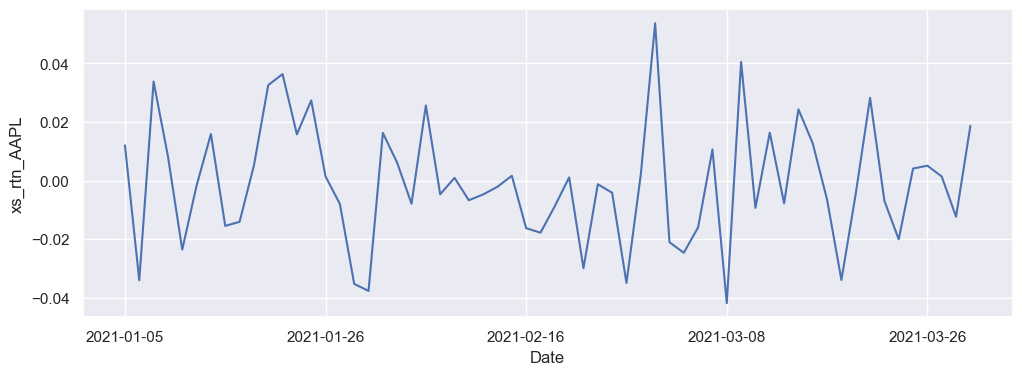

In [22]:
### Why is Treynor negative for AAPL?
print("Mean daily return for AAPL is %5f" %input_to_model['xs_rtn_AAPL'].mean())
plt.figure(figsize=(12,4))
sns.lineplot(input_to_model['xs_rtn_AAPL'])
step_size = 14
plt.xticks(ticks=range(0, len(input_to_model), step_size))
plt.show()

### Jensen's Alpha: CAPM performance

In [23]:
print(f'Alpha for Apple is %5f' %CAPM_results_AAPL.params.iloc[1])
print(f'Alpha for Microsoft is %5f' %CAPM_results_MSFT.params.iloc[1])
print(f'Alpha for Intel is %5f' %CAPM_results_INTC.params.iloc[1])
print(f'Alpha for IBM is %5f' %CAPM_results_IBM.params.iloc[1])

Alpha for Apple is -0.002381
Alpha for Microsoft is 0.000173
Alpha for Intel is 0.002578
Alpha for IBM is 0.000721


### Second Scenario: Environmental Services

In [24]:
### Used saved-off data
os.chdir('B:\\Documents\\Manning')
os.getcwd()
input_to_model = pd.read_csv('scen2_enviro_returns.csv'
                             , index_col="Date")
input_to_model.head()

,EVX,GFL,ROL,RSG,RTO,WCN,WM,XLI,risk_free_daily,xs_rtn_WM,xs_rtn_XLI,xs_rtn_RSG,xs_rtn_WCN,xs_rtn_ROL,xs_rtn_RTO,xs_rtn_GFL,xs_rtn_EVX
Date,,,,,,,,,,,,,,,,,
2024-03-12,0.001050,0.002009,0.001312,0.006349,0.003439,0.005721,0.002437,0.004438,0.021746,-0.019309,-0.017308,-0.015397,-0.016025,-0.020434,-0.018307,-0.019737,-0.020696
2024-03-13,0.004441,-0.005441,0.010483,0.002427,-0.028349,0.006281,0.005768,0.002700,0.021746,-0.015978,-0.019046,-0.019319,-0.015465,-0.011263,-0.050095,-0.027187,-0.017305
2024-03-14,-0.007615,-0.016700,-0.007132,0.002367,-0.011222,-0.003474,-0.003270,-0.004244,0.021746,-0.025016,-0.025990,-0.019379,-0.025220,-0.028878,-0.032968,-0.038446,-0.029361
2024-03-15,0.004951,-0.010835,0.008925,-0.000107,-0.010376,0.010045,0.001046,0.000164,0.021746,-0.020700,-0.021582,-0.021853,-0.011701,-0.012821,-0.032122,-0.032581,-0.016795
2024-03-18,0.002340,0.007401,0.006688,0.006817,0.005570,0.004739,0.005415,-0.001311,0.021746,-0.016331,-0.023057,-0.014929,-0.017007,-0.015058,-0.016176,-0.014345,-0.019406


In [25]:
### Get columns
enviro_stocks = [c for c in input_to_model.columns 
                 if not(c.startswith('xs_rtn'))]
print(enviro_stocks)

['EVX', 'GFL', 'ROL', 'RSG', 'RTO', 'WCN', 'WM', 'XLI', 'risk_free_daily']


### Now generate the model

In [26]:
### Create pandas series to input to model
y_gfl = input_to_model['xs_rtn_GFL']
y_rol = input_to_model['xs_rtn_ROL']
y_rsg = input_to_model['xs_rtn_RSG']
y_rto = input_to_model['xs_rtn_RTO']
y_wcn = input_to_model['xs_rtn_WCN']
y_wm = input_to_model['xs_rtn_WM']
X_xli = input_to_model['xs_rtn_XLI']
X_evx = input_to_model['xs_rtn_EVX']

In [27]:
### Constant value captures variation not explained by market
X_evx = sm.add_constant(X_evx, prepend=False)
X_xli = sm.add_constant(X_xli, prepend=False)

In [28]:
### Call to statsmodels OLS object to model on evx - append _e to identify
CAPM_GFL_e = sm.OLS(y_gfl, X_evx)
CAPM_results_GFL_e = CAPM_GFL_e.fit()

CAPM_ROL_e = sm.OLS(y_gfl, X_evx)
CAPM_results_ROL_e = CAPM_ROL_e.fit()

CAPM_RSG_e = sm.OLS(y_rol, X_evx)
CAPM_results_RSG_e = CAPM_RSG_e.fit()

CAPM_RTO_e = sm.OLS(y_rto, X_evx)
CAPM_results_RTO_e = CAPM_RTO_e.fit()

CAPM_WCN_e = sm.OLS(y_wcn, X_evx)
CAPM_results_WCN_e = CAPM_WCN_e.fit()

CAPM_WM_e = sm.OLS(y_wm, X_evx)
CAPM_results_WM_e = CAPM_WM_e.fit()

### Setup for SML - Scenario 2

In [29]:
### Mean market return and mean risk-free return
X_evx_rm = input_to_model['xs_rtn_EVX']
rm_evx = X_evx_rm.mean()
rf_mean_evx = input_to_model['risk_free_daily'].mean()

### Generate a list of the betas
betas = [CAPM_results_GFL_e.params.iloc[0]
         , CAPM_results_ROL_e.params.iloc[0],
         CAPM_results_RSG_e.params.iloc[0]
         , CAPM_results_RTO_e.params.iloc[0],
         CAPM_results_WCN_e.params.iloc[0]
         , CAPM_results_WM_e.params.iloc[0]]
beta_names = ['GFL','ROL','RSG','RTO','WCN','WM']

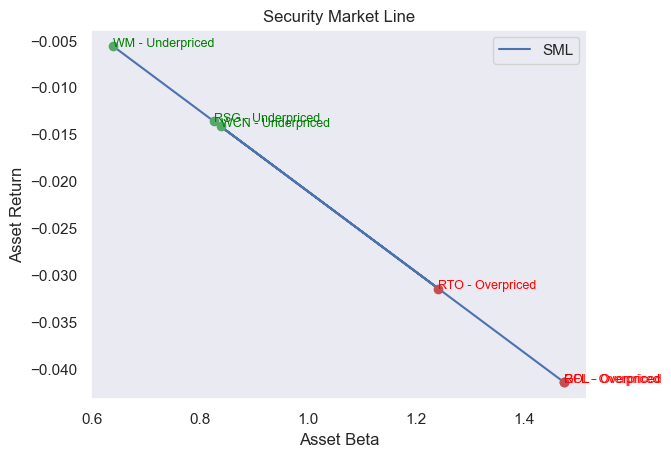

In [30]:
SML(rf=rf_mean_evx, rm=rm_evx, betas=betas, beta_names=beta_names)

### Inverted SML is really unusual

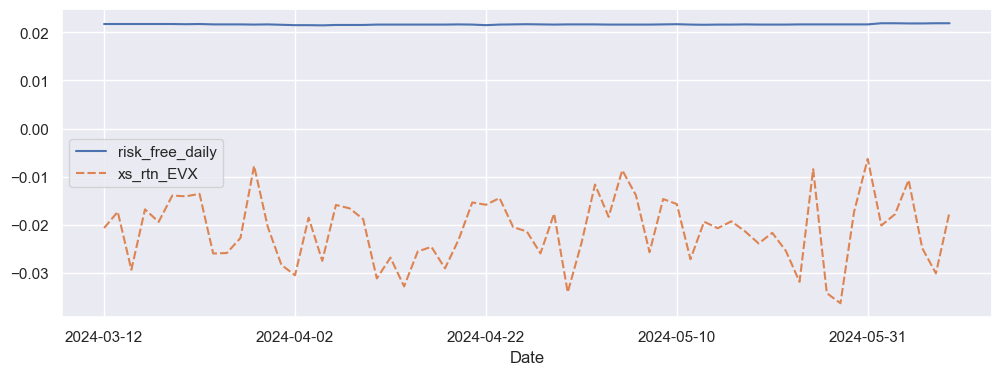

In [31]:
### Is something strange in the market?
plt.figure(figsize=(12,4))
sns.lineplot(input_to_model[['risk_free_daily','xs_rtn_EVX']])
## Clean up the x-axis
step_size = 14
plt.xticks(ticks=range(0, len(input_to_model), step_size))
plt.show()

### CAPM valuation is relative to 
### the risk-free rate and market return
### If the market return is negative, 
### CAPM shows a negative expected return

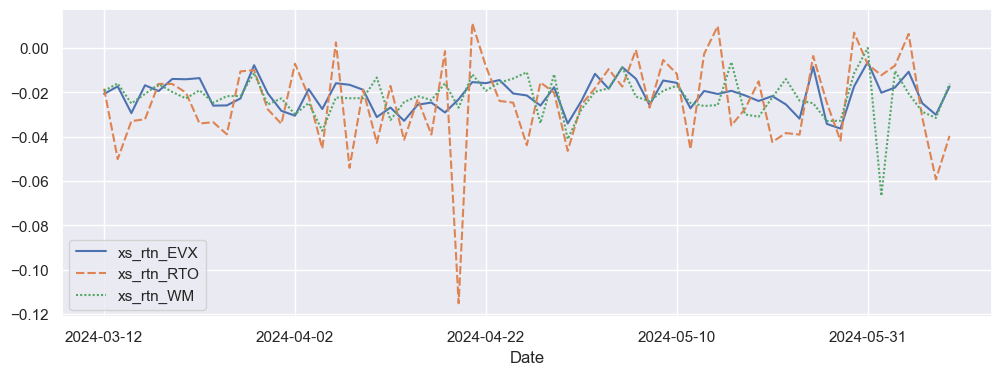

In [32]:
#### RTO overpriced, WM underpriced?
plt.figure(figsize=(12,4))
sns.lineplot(input_to_model[['xs_rtn_EVX','xs_rtn_RTO','xs_rtn_WM']])
## Clean up the x-axis
step_size = 14
plt.xticks(ticks=range(0, len(input_to_model), step_size))
plt.show()

### Pass in positive hypothetical results as actual results

In [33]:
help(SML)

Help on function SML in module __main__:

SML(rf, rm, betas, beta_names, use_actual=False, actual_ret=[0, 0, 0, 0])
    params:
        rf: risk-free rate, mean value
        ret: market return rate, mean
        betas: output of the CAPM fit, beta coefficient, as python list
        beta_names: for labels only, a list same length as betas
        use_actual: False if use CAPM to plot stock points, True if pass actual returns
        actual_ret: a list of returns, same length as betas and beta_names



In [34]:
### What Betas defined the CAPM line?
betas

[1.4756103691029305,
 1.4756103691029305,
 0.8256736009354676,
 1.2418713148036176,
 0.8380467500933669,
 0.6388283264227387]

In [35]:
### What return is implied to define the CAPM?
capm_rt = [rf_mean_evx + (rm_evx - rf_mean_evx) * i for i in betas]
print("CAPM estimated returns")
print(capm_rt)

print("Hypothetical returns")
hypo_rt = [1.075 * (r + 0.05) for r in capm_rt]
hypo_rt[1] = .00708
hypo_rt[4] = .0445
print(hypo_rt)

CAPM estimated returns
[-0.04144843391667659, -0.04144843391667659, -0.013648931596941315, -0.031450800761489026, -0.01417816367852871, -0.005657068547104068]
Hypothetical returns
[0.00919293353957267, 0.00708, 0.03907739853328809, 0.0199403891813993, 0.0445, 0.047668651311863125]


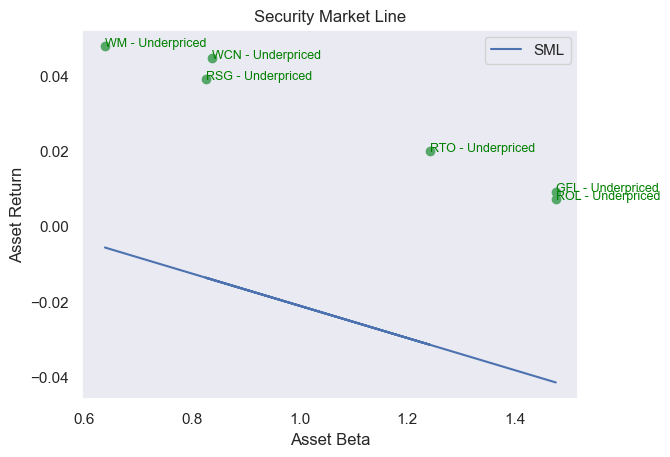

In [36]:
### Pass in hypothetical returns
SML(rf=rf_mean_evx, rm=rm_evx, betas=betas, beta_names=beta_names
    , use_actual=True, actual_ret=hypo_rt)

### Calculate Ratios - Scenario 2

In [37]:
just_enviro_stocks = [e for e in enviro_stocks 
                      if e not in('risk_free_daily','EVX','XLI')]
just_enviro_stocks

['GFL', 'ROL', 'RSG', 'RTO', 'WCN', 'WM']

In [39]:
### Sharpe Ratio is negative because returns below risk-free
for t in just_enviro_stocks:
    tmp = sharpe_on_df(input_to_model, 'xs_rtn_%s' %t
                       , 'risk_free_daily')
    print("Sharpe Ratio for %s: %5f" %(t, tmp))

Sharpe Ratio for GFL: -1.743982
Sharpe Ratio for ROL: -3.561241
Sharpe Ratio for RSG: -5.658467
Sharpe Ratio for RTO: -2.262301
Sharpe Ratio for WCN: -5.290043
Sharpe Ratio for WM: -4.594780


In [42]:
### Treynor Ratio is also negative because returns below risk-free
### while Betas are positive so ratio is negative
for t in just_enviro_stocks:
    _diff = input_to_model['xs_rtn_%s' %t].mean() 
    - input_to_model['risk_free_daily'].mean()
    try:
        _beta = beta_dict['%s' %t]
    except:
        _beta = 1
    print("Treynor Ratio for %s: %5f" %(t, _diff/_beta))

Treynor Ratio for GFL: -0.020401
Treynor Ratio for ROL: -0.021232
Treynor Ratio for RSG: -0.021344
Treynor Ratio for RTO: -0.024384
Treynor Ratio for WCN: -0.021635
Treynor Ratio for WM: -0.022207


In [43]:
print(f'Alpha for Green For Life is %5f' 
      %CAPM_results_GFL_e.params.iloc[1])
print(f'Alpha for Rollins, Inc. is %5f' 
      %CAPM_results_ROL_e.params.iloc[1])
print(f'Alpha for Republic Svcs is %5f' 
      %CAPM_results_RSG_e.params.iloc[1])
print(f'Alpha for Rentokil is %5f' 
      %CAPM_results_RTO_e.params.iloc[1])
print(f'Alpha for Waste Connections is %5f' 
      %CAPM_results_WCN_e.params.iloc[1])
print(f'Alpha for Waste Management is %5f' 
      %CAPM_results_WM_e.params.iloc[1])

Alpha for Green For Life is 0.010742
Alpha for Rollins, Inc. is 0.010742
Alpha for Republic Svcs is -0.003806
Alpha for Rentokil is 0.001826
Alpha for Waste Connections is -0.003948
Alpha for Waste Management is -0.008724
